# Build a model to predict the marks of the student

# Problem Statement: -

Universities are very prestigious places to access higher education. But the amount of fees universities charge today never equals the support they give to students. Some students need a lot of attention from instructors because if special attention will not be given to those students who are not getting good grades, it could be detrimental to their emotional state and their career in the long run.

By using machine learning algorithms, we can predict how well the students are going to perform so that we can help the students whose grades are predicted low. 

The goal of this challenge is to build a machine learning model for Sudent Grades Prediction is based on the problem of regression in machine learning.

# Dataset: -
The dataset is downloaded from UCI Machine Learning Repository.

# Attribute Information:

~ school        
~ sex           
~ age           
~ famsize       
~ Pstatus       
~ Medu          
~ Fedu          
~ Mjob          
~ Fjob          
~ reason        
~ guardian      
~ traveltime    
~ studytime     
~ failures      
~ schoolsup     
~ famsup        
~ paid          
~ activities    
~ nursery       
~ higher        
~ internet      
~ romantic      
~ famrel        
~ freetime      
~ goout         
~ Dalc          
~ Walc          
~ health        
~ absences      
~ G1            
~ G2            
~ G3 

The project is simple yet challenging as it is has very limited features & samples. 


# Step 1: Import all the required libraries

- __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
- __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
- __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
- __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- __Matplotlib__ : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

In [214]:
#Loading libraries 
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import warnings

warnings.filterwarnings('ignore')

# Step 2 : Read dataset and basic details of dataset
Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.


In this stage we are going to read our problem dataset and have a look on it.

In [215]:
#loading the dataset
try:
    df = pd.read_csv('student-mat.csv') #Path for the file
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [216]:
# To view the content inside the dataset we can use the head() method returns a specified number of rows, string from the top. 
# The head() method returns the first 5 rows if a number is not specified.
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [217]:
df = df.drop(labels='address', axis=1)
df = df.drop(labels='romantic', axis=1)

# Data Preprocessing

Now before moving forward, let’s have a look at whether this dataset contains any null values or not.

In [218]:
print(df.isnull().sum())

school        0
sex           0
age           0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


As we observed, the data is ready to use because there are no null values in the data. 
There is a column in the data containing information about the number of courses students have chosen. 
Let’s look at the number of values of all values of this column:

#### The df.value_counts() method counts the number of types of values a particular column contains. 

In [219]:
df.shape

(395, 31)

#### The df.shape method shows the shape of the dataset. 

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

#### The df.info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. 

In [221]:
df.iloc[1]

school             GP
sex                 F
age                17
famsize           GT3
Pstatus             T
Medu                1
Fedu                1
Mjob          at_home
Fjob            other
reason         course
guardian       father
traveltime          1
studytime           2
failures            0
schoolsup          no
famsup            yes
paid               no
activities         no
nursery            no
higher            yes
internet          yes
famrel              5
freetime            3
goout               3
Dalc                1
Walc                1
health              3
absences            4
G1                  5
G2                  5
G3                  6
Name: 1, dtype: object

####  df.iloc[ ] is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. The iloc property gets, or sets, the value(s) of the specified indexes.

### Data Type Check for every column. 

In [222]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [223]:
print("Total number of cateogrical columns are ", len(objects_lst))
print("There names are as follows: ", objects_lst)

Total number of cateogrical columns are  15
There names are as follows:  ['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet']


In [224]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [225]:
print("Total number of numerical columns are ", len(int64_lst))
print("There names are as follows: ", int64_lst)

Total number of numerical columns are  16
There names are as follows:  ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [226]:
float64_cols = ['float64']
float64_lst = list(df.select_dtypes(include=float64_cols).columns)

In [227]:
print("Total number of float64 columns are ", len(float64_lst))
print("There name are as follow: ", float64_lst)

Total number of float64 columns are  0
There name are as follow:  []


In [228]:
#count the total number of rows and columns.
print ('The new dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new dataset has 395 rows and 31 columns


# Step 3: Descriptive Analysis

Goal/Purpose:  Finding the data distribution of the features. Visualization, it helps to understand data and also to explain the data to another person.

Things we are going to do in this step:

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers
12. Correlation
13. Skewness

In [229]:
df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

#### The df.describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. 

# Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

# 1. Standard Deviation

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.

In [230]:
df.std()

age           1.276043
Medu          1.094735
Fedu          1.088201
traveltime    0.697505
studytime     0.839240
failures      0.743651
famrel        0.896659
freetime      0.998862
goout         1.113278
Dalc          0.890741
Walc          1.287897
health        1.390303
absences      8.003096
G1            3.319195
G2            3.761505
G3            4.581443
dtype: float64

#### We can also understand the standard deviation using the below function.

In [231]:
def std_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df

In [232]:
std_cal(df, float64_lst)

normal_value  zero_value
0             0           0

In [233]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)
std_cal(df,int64_lst)

normal_value  zero_value
0            16           0

# 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

In [234]:
df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

#### We can also understand the Variance using the below function.

In [235]:
zero_cols = []

def var_cal(df,float64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df

In [236]:
var_cal(df, float64_lst)

normal_value  zero_value
0             0           0

In [237]:
var_cal(df, int64_lst)

normal_value  zero_value
0            16           0

# Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.



# 1. Mean

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

In [238]:
df.mean()

age           16.696203
Medu           2.749367
Fedu           2.521519
traveltime     1.448101
studytime      2.035443
failures       0.334177
famrel         3.944304
freetime       3.235443
goout          3.108861
Dalc           1.481013
Walc           2.291139
health         3.554430
absences       5.708861
G1            10.908861
G2            10.713924
G3            10.415190
dtype: float64

#### We can also understand the mean using the below function. 

In [239]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df

In [240]:
mean_cal(df, int64_lst)

normal_value  zero_value
0            16           0

In [241]:
mean_cal(df,float64_lst)

normal_value  zero_value
0             0           0

# 2.Median

The median is the middle value. It is the value that splits the dataset in half.

In [242]:
df.median()

age           17.0
Medu           3.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       4.0
G1            11.0
G2            11.0
G3            11.0
dtype: float64

####  We can also understand the median using the below function. 

In [243]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in float64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df

In [244]:
median_cal(df, float64_lst)

normal_value  zero_value
0             0           0

# 3. Mode

The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

In [245]:
df.mode()

school sex  age famsize Pstatus  Medu  Fedu   Mjob   Fjob  reason  ...  \
0     GP   F   16     GT3       T     4     2  other  other  course  ...   

  famrel  freetime  goout  Dalc Walc health absences  G1 G2  G3  
0      4         3      3     1    1      5        0  10  9  10  

[1 rows x 31 columns]

In [246]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in float64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df

In [247]:
mode_cal(df, list(df.columns))

normal_value  zero_value  string_value
0             0           0             0

# Null and Nan values

1. **Null Values**

In [248]:
df.isnull().sum()

school        0
sex           0
age           0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

As we notice that there are no null values in our dataset.

2. **Nan Values**

In [249]:
df.isna().sum()

school        0
sex           0
age           0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

As we notice that there are no nan values in our dataset.

#### Another way to remove null and nan values is to use the method "df.dropna(inplace=True)". 

# Count of unique occurences of every value in all categorical value



In [250]:
for value in objects_lst:
    
    print(f"{value:{10}} {df[value].value_counts()}")

school     GP    349
MS     46
Name: school, dtype: int64
sex        F    208
M    187
Name: sex, dtype: int64
famsize    GT3    281
LE3    114
Name: famsize, dtype: int64
Pstatus    T    354
A     41
Name: Pstatus, dtype: int64
Mjob       other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64
Fjob       other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64
reason     course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64
guardian   mother    273
father     90
other      32
Name: guardian, dtype: int64
schoolsup  no     344
yes     51
Name: schoolsup, dtype: int64
famsup     yes    242
no     153
Name: famsup, dtype: int64
paid       no     214
yes    181
Name: paid, dtype: int64
activities yes    201
no     194
Name: activities, dtype: int64
nursery    yes    314
no      81
Name: nursery, dtype: int64
higher     yes    375
no      20
Name: hi

In [251]:
df.head()

school sex  age famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  ...  \
0     GP   F   18     GT3       A     4     4  at_home   teacher  course  ...   
1     GP   F   17     GT3       T     1     1  at_home     other  course  ...   
2     GP   F   15     LE3       T     1     1  at_home     other   other  ...   
3     GP   F   15     GT3       T     4     2   health  services    home  ...   
4     GP   F   16     GT3       T     3     3    other     other    home  ...   

  famrel  freetime  goout  Dalc Walc health absences  G1  G2  G3  
0      4         3      4     1    1      3        6   5   6   6  
1      5         3      3     1    1      3        4   5   5   6  
2      4         3      2     2    3      3       10   7   8  10  
3      3         2      2     1    1      5        2  15  14  15  
4      4         3      2     1    2      5        4   6  10  10  

[5 rows x 31 columns]

- Categorical data are variables that contain label values rather than numeric values.The number of possible values is often limited to a fixed set.
- We will use Label Encoder to label the categorical data. Label Encoder is the part of SciKit Learn library in Python and used to convert categorical data, or text data, into numbers, which our predictive models can better understand.



In [253]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.school = le.fit_transform(df.school)
df.sex = le.fit_transform(df.sex)
df.age = le.fit_transform(df.age)
df.famsize = le.fit_transform(df.famsize)
df.Pstatus = le.fit_transform(df.Pstatus)
df.Mjob = le.fit_transform(df.Mjob)
df.Fjob = le.fit_transform(df.Fjob)
df.reason = le.fit_transform(df.reason)
df.guardian = le.fit_transform(df.guardian)
df.schoolsup = le.fit_transform(df.schoolsup)
df.famsup = le.fit_transform(df.famsup)
df.paid = le.fit_transform(df.paid)
df.activities = le.fit_transform(df.activities)
df.nursery = le.fit_transform(df.nursery)
df.higher = le.fit_transform(df.higher)
df.internet = le.fit_transform(df.internet)

# Skewness 

Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

#### Below is the function to calculate skewness. 

In [255]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in float64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [256]:
float64_cols = ['float64']
float64_lst_col = list(df.select_dtypes(include=float64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, float64_lst_col)

In [257]:
skew_df

Empty DataFrame
Columns: [column, skewness_value, skewness (+ve or -ve)]
Index: []

In [258]:
skew_total_df

positive (+ve) skewed  normal distrbution  negative (-ve) skewed
0                      0                   0                      0

Notice the above results.

# Step 4: Data Exploration
Goal/Purpose:

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

# 1. Histogram

A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis.The vertical y-axis represents the number count or percentage of occurrences in the data for each column

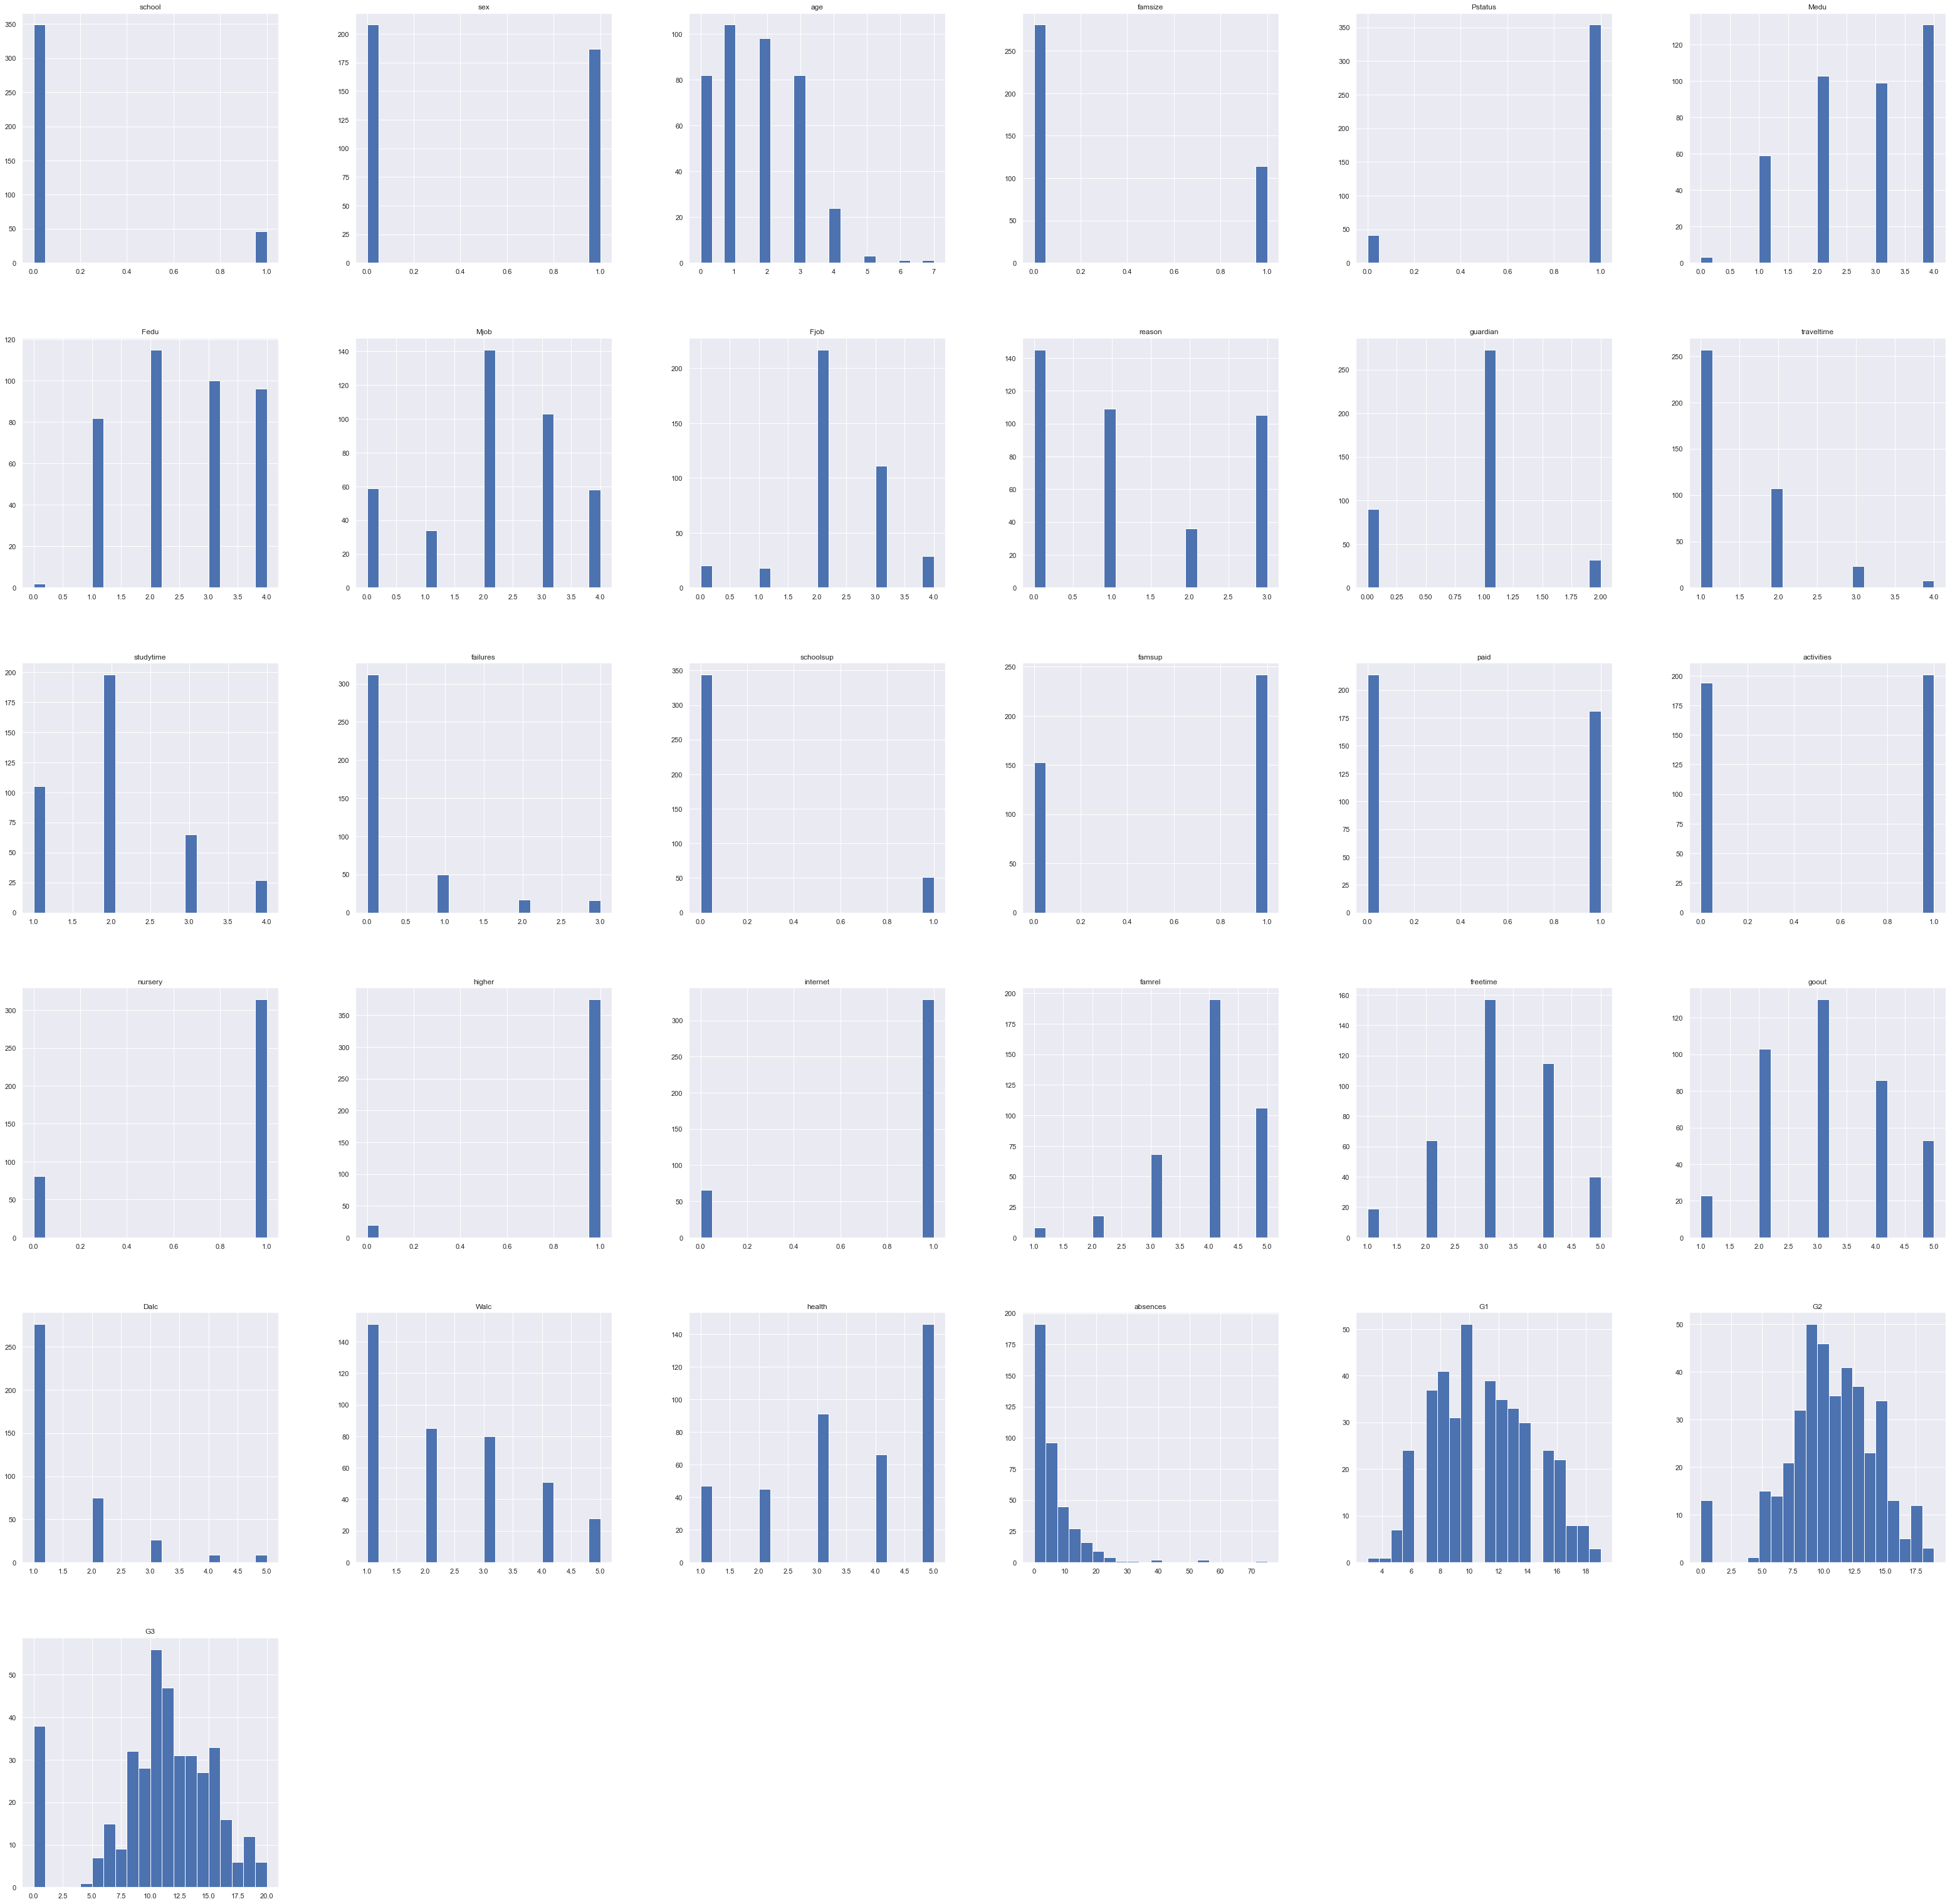

In [259]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(55,55))
plt.show()

# 2. Distplot

A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables. The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it 

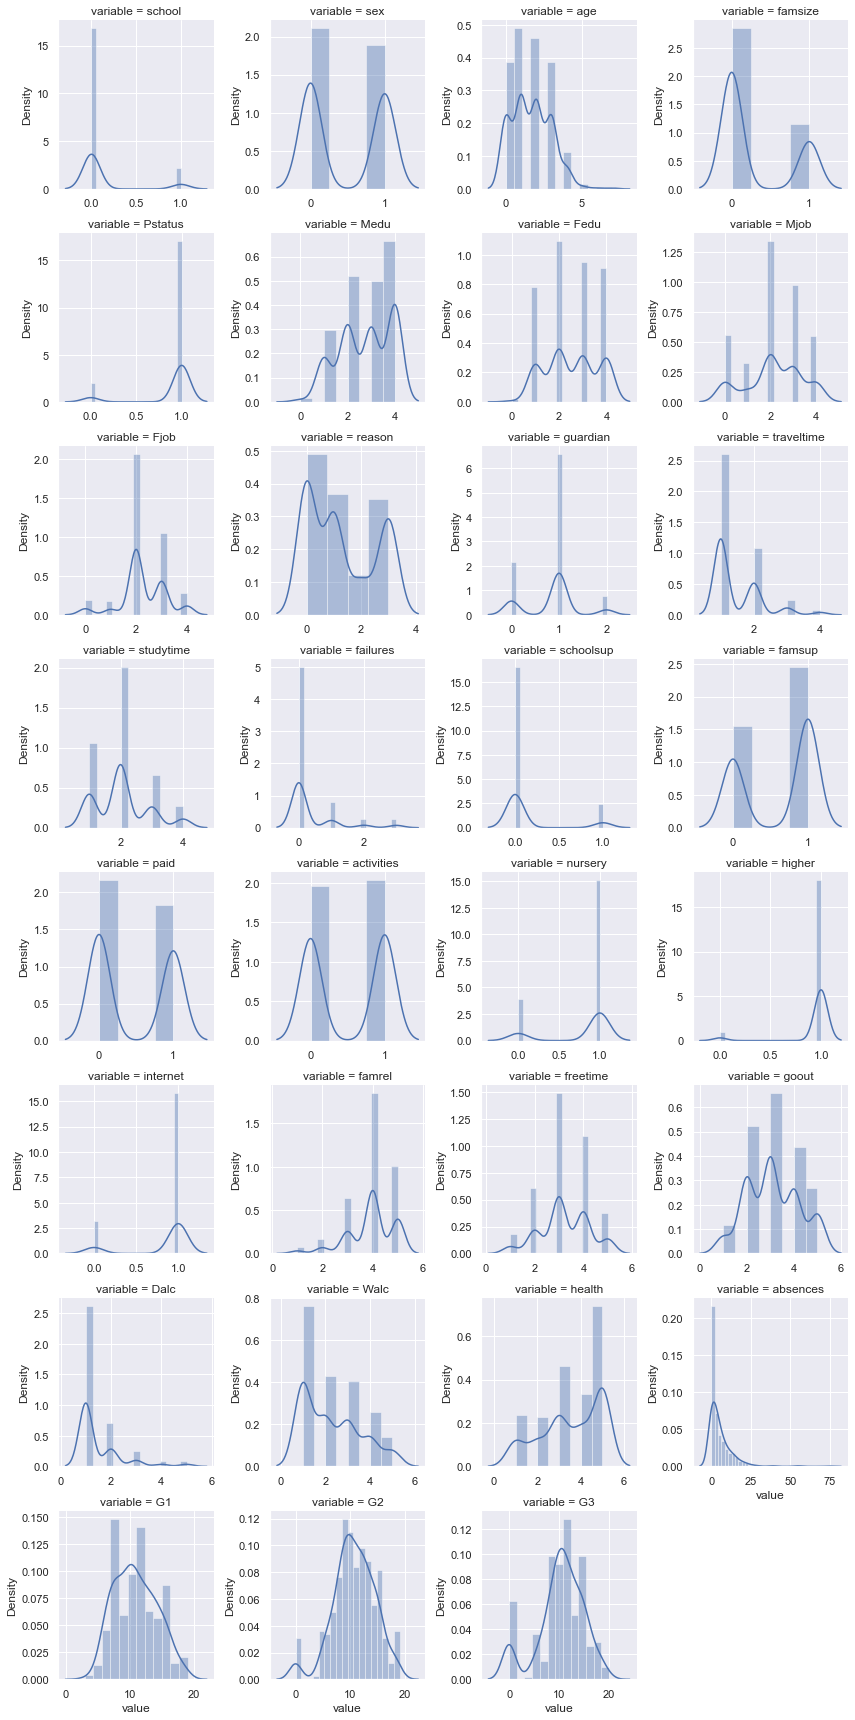

In [260]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

Above is the distrution bar graphs to confirm about statistics of the data about the skewness.

Let's proceed and check the distribution of the target variable.


#### The target variable is positively skewed. 

# 3. Heatmap




A heatmap (or heat map) is a graphical representation of data where values are depicted by color.Heatmaps make it easy to visualize complex data and understand it at a glance 

__Correlation__ - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

Correlation can have a value:

- 1 is a perfect positive correlation
- 0 is no correlation (the values don't seem linked at all)
- -1 is a perfect negative correlation



In [261]:
#correlation plot
sns.set(rc = {'figure.figsize':(500,500)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True) 
plt.show()

In [262]:
corr

school       sex       age   famsize   Pstatus      Medu  \
school      1.000000  0.012286  0.377610  0.064866  0.045923  0.133333   
sex         0.012286  1.000000  0.028606  0.089862  0.023443  0.078228   
age         0.377610  0.028606  1.000000  0.037847  0.029598  0.163658   
famsize     0.064866  0.089862  0.037847  1.000000  0.149612  0.043068   
Pstatus     0.045923  0.023443  0.029598  0.149612  1.000000  0.123565   
Medu        0.133333  0.078228  0.163658  0.043068  0.123565  1.000000   
Fedu        0.079807  0.034878  0.163438  0.058879  0.088730  0.623455   
Mjob        0.056670  0.191421  0.069104  0.071386  0.054476  0.454805   
Fjob        0.018974  0.084957  0.035191  0.084448  0.033892  0.157920   
reason      0.090010  0.095867  0.015337  0.019212  0.003553  0.117653   
guardian    0.011109  0.071343  0.290485  0.002718  0.108715  0.023918   
traveltime  0.242308  0.059722  0.070641  0.063493  0.028265  0.171639   
studytime   0.090681  0.306268  0.004140  0.073595  0.024294  0.064944   
failures    0.059804  0.044436  0.243665  0.015769  0.003339  0.236680   
schoolsup   0.139789  0.138271  0.251811  0.028642  0.042238  0.036029   
famsup      0.164967  0.151623  0.140609  0.112893  0.019067  0.183727   
paid        0.017083  0.129126  0.035933  0.013882  0.046435  0.159700   
activities  0.116946  0.099833  0.103063  0.000113  0.097352  0.108277   
nursery     0.089277  0.008203  0.086632  0.102088  0.090615  0.193263   
higher      0.024150  0.151056  0.209081  0.005806  0.040735  0.168845   
internet    0.133578  0.044113  0.112094  0.000720  0.070074  0.201463   
famrel      0.047926  0.058971  0.053940  0.022776  0.025179  0.003914   
freetime    0.032988  0.238744  0.016434  0.017695  0.038717  0.030891   
goout       0.007152  0.075897  0.126964  0.023064  0.003459  0.064094   
Dalc        0.114209  0.268171  0.131125  0.101521  0.030590  0.019834   
Walc        0.065087  0.274194  0.117276  0.103425  0.006045  0.047123   
health      0.042651  0.143588  0.062187  0.028992  0.022307  0.046878   
absences    0.088480  0.066962  0.175230  0.035783  0.134937  0.100285   
G1          0.025731  0.091839  0.064081  0.071445  0.016868  0.205341   
G2          0.050086  0.091099  0.143474  0.081223  0.041382  0.215527   
G3          0.045017  0.103456  0.161579  0.081407  0.058009  0.217147   

                Fedu      Mjob      Fjob    reason  ...    famrel  freetime  \
school      0.079807  0.056670  0.018974  0.090010  ...  0.047926  0.032988   
sex         0.034878  0.191421  0.084957  0.095867  ...  0.058971  0.238744   
age         0.163438  0.069104  0.035191  0.015337  ...  0.053940  0.016434   
famsize     0.058879  0.071386  0.084448  0.019212  ...  0.022776  0.017695   
Pstatus     0.088730  0.054476  0.033892  0.003553  ...  0.025179  0.038717   
Medu        0.623455  0.454805  0.157920  0.117653  ...  0.003914  0.030891   
Fedu        1.000000  0.243327  0.200169  0.043099  ...  0.001370  0.012846   
Mjob        0.243327  1.000000  0.196758  0.022022  ...  0.038584  0.114321   
Fjob        0.200169  0.196758  1.000000  0.027688  ...  0.013709  0.047475   
reason      0.043099  0.022022  0.027688  1.000000  ...  0.014934  0.066834   
guardian    0.133644  0.014787  0.080511  0.000664  ...  0.040979  0.045716   
traveltime  0.158194  0.109752  0.055878  0.067034  ...  0.016808  0.017025   
studytime   0.009175  0.023097  0.076817  0.146228  ...  0.039731  0.143198   
failures    0.250408  0.073377  0.008275  0.067094  ...  0.044337  0.091987   
schoolsup   0.037530  0.040958  0.011657  0.018516  ...  0.001345  0.045465   
famsup      0.185496  0.050667  0.030159  0.090964  ...  0.020436  0.010538   
paid        0.086981  0.096566  0.040435  0.133559  ...  0.000460  0.064253   
activities  0.112643  0.098754  0.032391  0.115848  ...  0.040687  0.089728   
nursery     0.157177  0.095848  0.030812  0.055659  ...  0.003581  0.024696   
higher      0.174566  0.097887  0.045250  0.058504  ...  0.024319

#### As we know, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors.




# 4. Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”).

In [263]:
features = ['school','sex','age','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2']

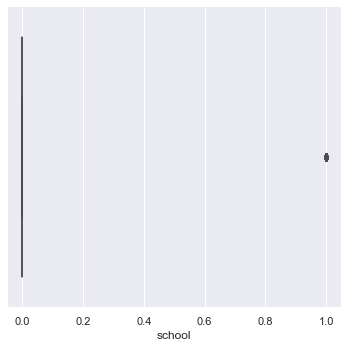

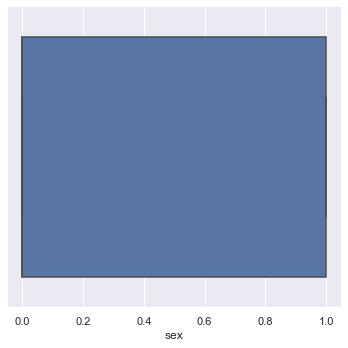

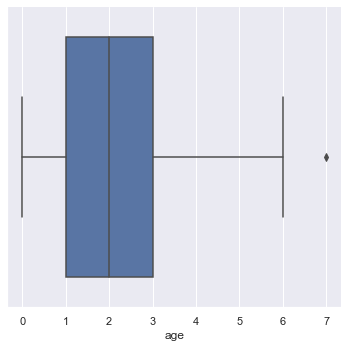

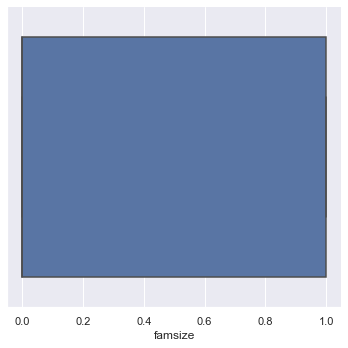

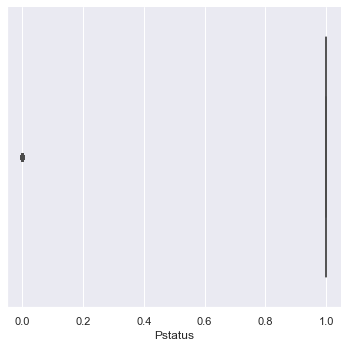

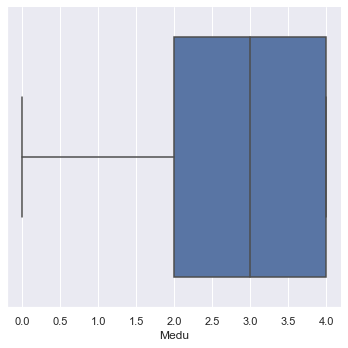

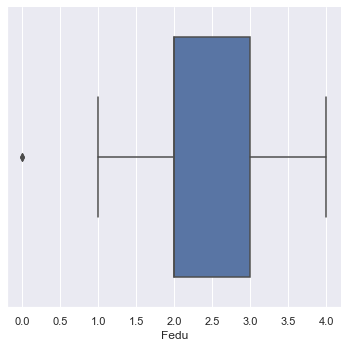

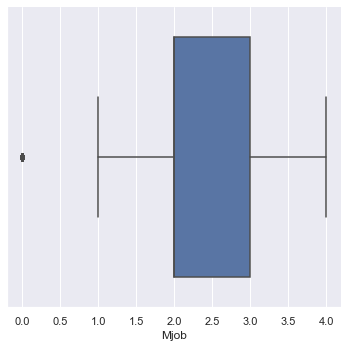

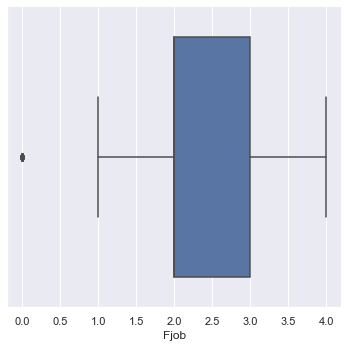

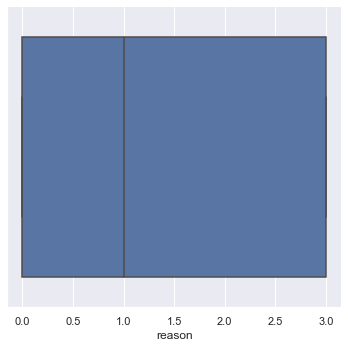

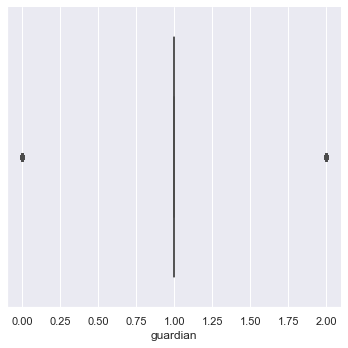

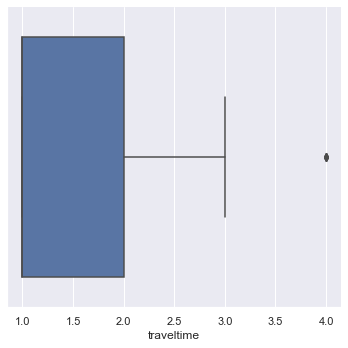

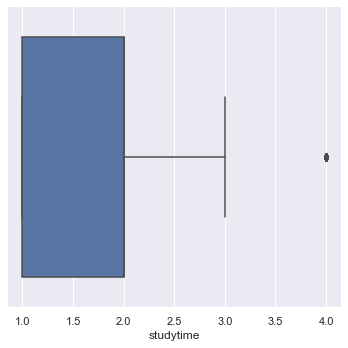

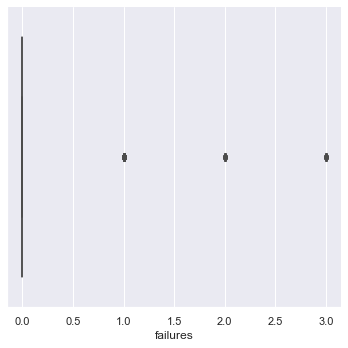

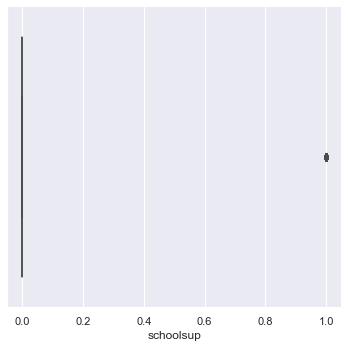

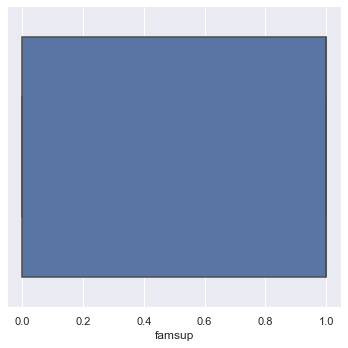

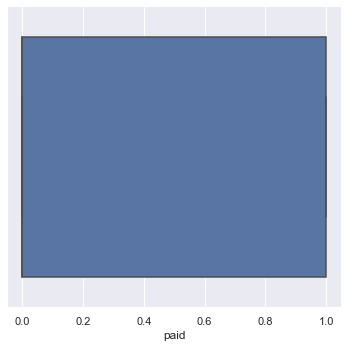

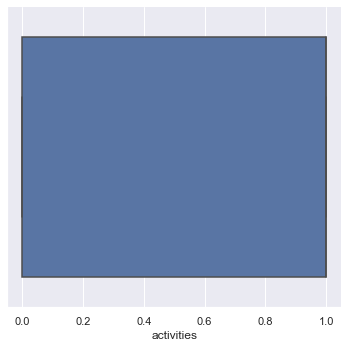

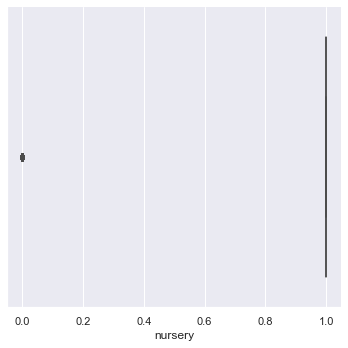

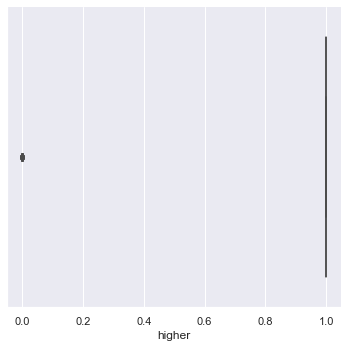

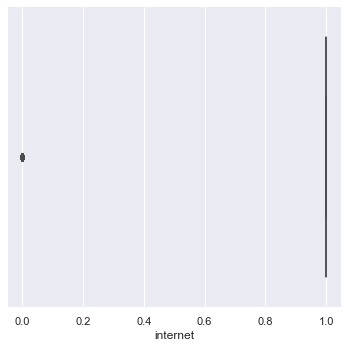

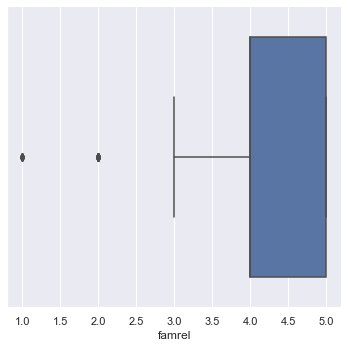

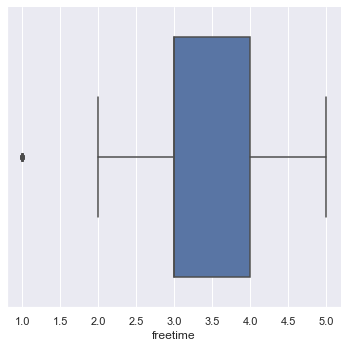

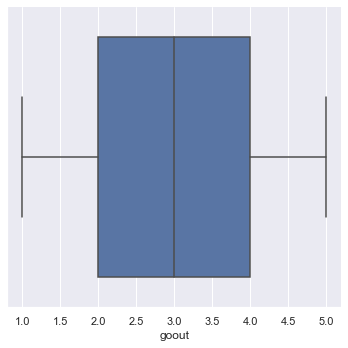

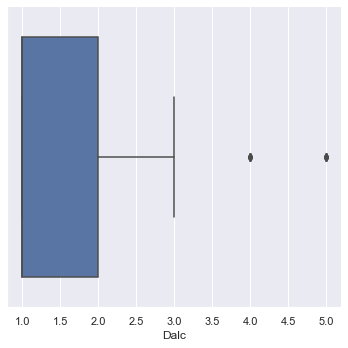

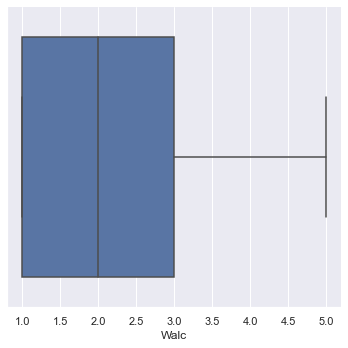

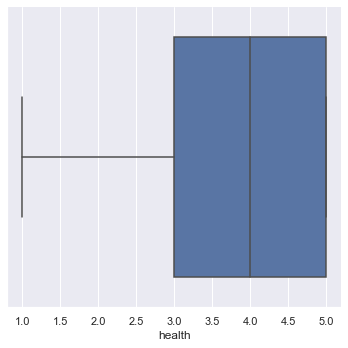

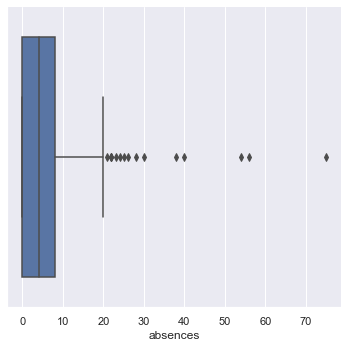

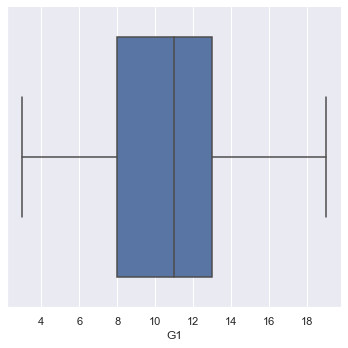

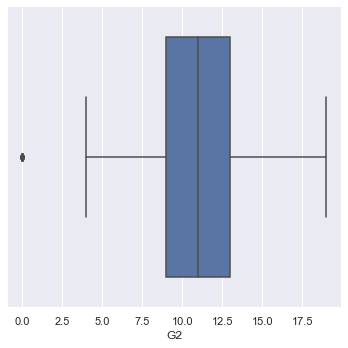

In [264]:
for value in features:
    sns.catplot(data=df, x=value,  kind="box")

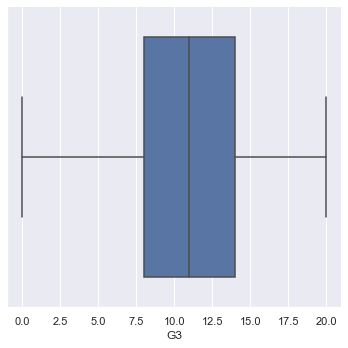

In [265]:
#for target variable
sns.catplot(data=df, x='G3', kind='box')

#### The dark points are known as Outliers. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

NOTICED ~ 
- Sometimes outliers may be errors in the data and should be removed. In this case these points are correct readings yet they are so different from the other points that they appear to be incorrect.

- The best way to decide wether to remove them or not is to train models with and without these data points and- compare their validation accuracy.

- So we gonna let is slide as it isn't gonna be effect our model.




# 5. Scatter Plot

In [52]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [196]:
figure = px.scatter(data_frame=df, x = df["G3"], 
                    y = df["schoolsup"], size = "internet", 
                   title="Grade Scored", trendline="ols")
figure.show()


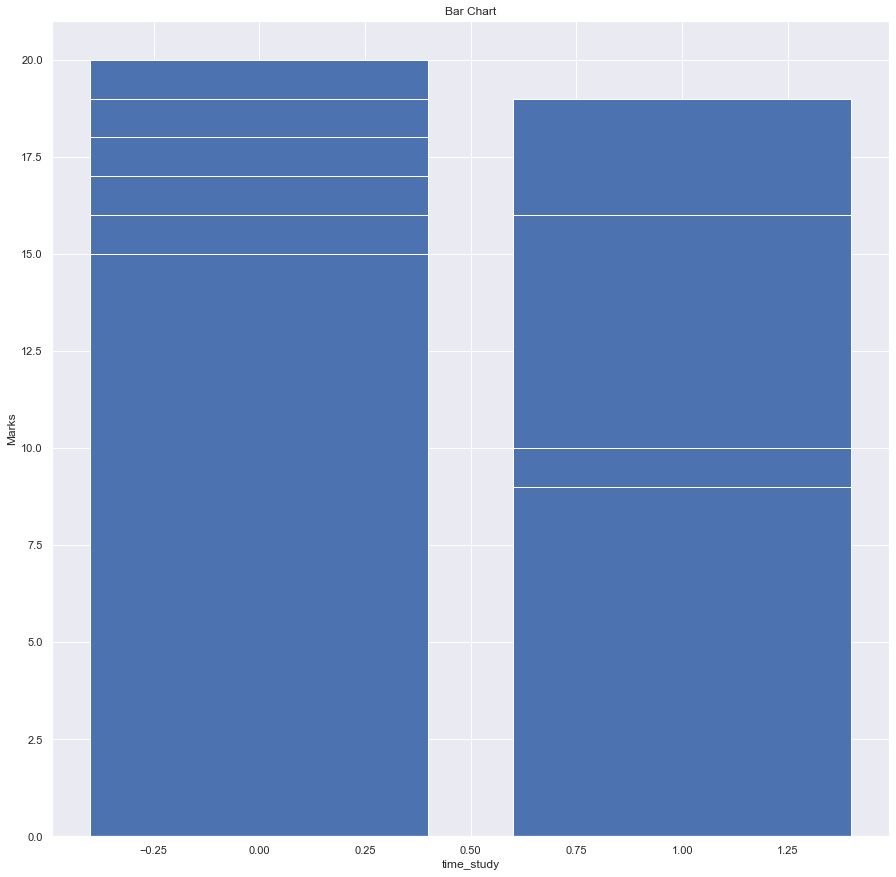

In [193]:
plt.bar(df['school'], df['G3'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('time_study')
plt.ylabel('Marks')
 
# Adding the legends
plt.show()

It defines the relation between the school opted to total Grade by the student.

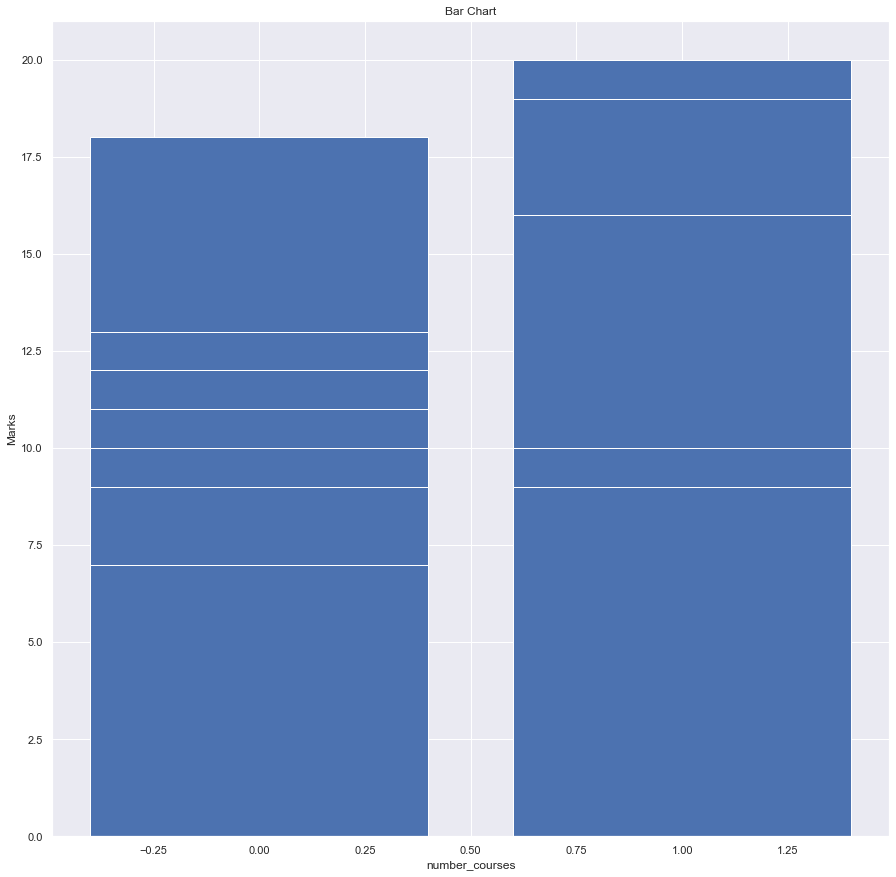

In [194]:
plt.bar(df['internet'], df['G3'])
 
plt.title("Bar Chart")
 
# Setting the X and Y labels
plt.xlabel('number_courses')
plt.ylabel('Marks')
 
# Adding the legends
plt.show()

It defines the relation between the students with internet access to grade scored by the student.

# Step 2: Data Preparation
**Goal:-**

Tasks we are going to in this step:

1. Now we gonna spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.
2. Split dataset into train and test dataset.
3. Scaling on train dataset.

**1. Now we spearate the target variable and feature columns in two different dataframe and will check the shape of the dataset for validation purpose.**

In [266]:
# Separate target and feature column in X and y variable

target = 'G3'

# X will be the features
X = df.drop(target,axis=1) 
#y will be the target variable
y = df[target]

In [267]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int64
 1   sex         395 non-null    int64
 2   age         395 non-null    int64
 3   famsize     395 non-null    int64
 4   Pstatus     395 non-null    int64
 5   Medu        395 non-null    int64
 6   Fedu        395 non-null    int64
 7   Mjob        395 non-null    int64
 8   Fjob        395 non-null    int64
 9   reason      395 non-null    int64
 10  guardian    395 non-null    int64
 11  traveltime  395 non-null    int64
 12  studytime   395 non-null    int64
 13  failures    395 non-null    int64
 14  schoolsup   395 non-null    int64
 15  famsup      395 non-null    int64
 16  paid        395 non-null    int64
 17  activities  395 non-null    int64
 18  nursery     395 non-null    int64
 19  higher      395 non-null    int64
 20  internet    395 non-null    int6

In [268]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [269]:
# Check the shape of X and y variable
X.shape, y.shape

((395, 30), (395,))

In [270]:
# Reshape the y variable 
y = y.values.reshape(-1,1)

In [271]:
# Again check the shape of X and y variable
X.shape, y.shape

((395, 30), (395, 1))

#### 2. Spliting the dataset in training and testing data. 

*Here we are spliting our dataset into 80/20 percentage where 80% dataset goes into the training and 20% goes into testing the part.*

In [272]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 80-20% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [273]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 30), (79, 30), (316, 1), (79, 1))

# Step 3: Model Training

#### Goal:
In this step we are going to train our dataset on different regression algorithms. As we know that our target variable is in discrete format so we have to apply algorithm.**

*Algorithms we are going to use in this step.*

1. LinearRegression
2. LassoRegression

K-fold cross validation is a procedure used to estimate the skill of the model on new data. There are common tactics that you can use to select the value of k for your dataset. There are commonly used variations on cross-validation, such as stratified and repeated, that are available in scikit-learn

In [274]:
# Define kfold with 10 split
cv = KFold(n_splits=10, shuffle=True, random_state=42)

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

# 1. Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

#### Train set cross-validation 
Now I will train a machine learning model using the linear regression algorithm:

In [275]:
#Using Linear Regression Algorithm to the Training Set
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7576397365092227

In [276]:
#Accuracy check of trainig data
from sklearn.metrics import r2_score
#Get R2 score
model.score(X_train, y_train)

0.8580416257290754

In [277]:
#Accuracy of test data
model.score(X_test, y_test) 

0.7576397365092227

In [278]:
# Getting kfold values
lg_scores = -1 * cross_val_score(model, 
                                 X_train, 
                                 y_train, 
                                 cv=cv, 
                                 scoring='neg_root_mean_squared_error')
lg_scores

array([1.14085048, 1.91971311, 2.48657269, 2.37645538, 2.07356566,
       1.35149057, 1.19949618, 1.82302535, 2.47195623, 1.92871335])

In [279]:
# Mean of the train kfold scores
lg_score_train = np.mean(lg_scores)
lg_score_train

1.8771839013752931

### Prediction 

Now we will perform prediction on the dataset using Logistic Regression.

In [280]:
# Predict the values on X_test_scaled dataset 
y_predicted = model.predict(X_test)

In [281]:
rg = r2_score(y_test,y_predicted)*100
rg

75.76397365092227

# 2. Lasso Regression

Lasso regression algorithm is defined as a regularization algorithm that assists in the elimination of irrelevant parameters, thus helping in the concentration of selection and regularizes the models.

In [282]:
#Using Lasso Regression
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

In [283]:
#looking for training data
clf.fit(X_train,y_train)

Lasso(alpha=0.1)

In [284]:
#Accuracy check for training data
clf.score(X_train,y_train)

0.8457860347437882

In [285]:
y_predicted1 = clf.predict(X_test)

In [286]:
#Accuracy check of test data
lg = r2_score(y_test,y_predicted1)*100
lg

78.86934068584178

# Insight: -

In [287]:
cal_metric=pd.DataFrame([rg,lg],columns=["Student Grades"])
cal_metric.index=['Linear Regression',
                  'Lasso Regression']
                
cal_metric

Student Grades
Linear Regression       75.763974
Lasso Regression        78.869341

As we observe that the result of Lasso Regression shows well defined accuracy i.e. 78% approximately.

# Step 4: Save Model
**Goal:- In this step we are going to save our model in pickel format file.**

In [288]:
import pickle
pickle.dump(model , open('StudentGradesPrediction_LinearRegresssion.pkl', 'wb'))
pickle.dump(clf , open('StudentGradesPrediction_LassoRegresssion.pkl', 'wb'))

In [289]:
import pickle

def prediction(features):
    
    pickled_model = pickle.load(open('StudentGradesPrediction_LinearRegresssion.pkl', 'rb'))
    Stgrade = str(list(pickled_model.predict(features)))
    
    return str(f'The Student Grade is {Stgrade}')

#### We can test our model by giving our own parameters or features to predict. 

In [290]:
school = 1
sex = 0          
age = 18         
famsize = 0      
Pstatus = 0    
Medu = 1        
Fedu = 1        
Mjob = 1        
Fjob = 1        
reason = 1        
guardian = 0      
traveltime = 2    
studytime = 1    
failures = 0    
schoolsup = 1   
famsup = 1       
paid= 1         
activities = 1  
nursery = 1     
higher= 1       
internet = 0     
famrel= 1    
freetime = 1  
goout= 1        
Dalc= 1         
Walc= 1         
health= 1        
absences= 1      
G1= 7
G2= 14          

In [292]:
print(prediction([[school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2]]))

The Student Grade is [array([9.41601578])]


# Step 5: After making model and checking its accuracy, we are going to deploy it in API/ Web App. 

This step holds a great importance as in this step we make a Web API which interagtes our model and let it interacys with user.
The user simply put data he is asked to fill and our API will help in predicting.

### There are many methods to create Web Application like Flask, Streamlit, etc. We going to use streamlit to create API. Below is an API refrence. 

https://tinyurl.com/bdexnk6v

# Conclusion:

After observing the problem statement we have build an efficient model to overcome it. The above model helps in predicting the grades of the student. The accuracy for the prediction is 78% approximately and it signifies the accurate prediction of the grade.  